# 21stCenturyWeather Flagship rAM3 domains

In [1]:
# Developed by Scott Wales at CLEX

from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot

def plot_region(ax, 
                name: str, 
                centre: T.Tuple[float, float], 
                res: T.Tuple[float, float], 
                size: T.Tuple[int, int], 
                pole: T.Tuple[float, float]=(90,180), 
                rim: int=9, 
                halo: T.Tuple[int, int]=(7,7), 
                **kwargs):
    """
    Plots a LAM region, including its rim and halo
    """
    
    corners = draw_box_centre_size(ax, name, centre, res, size, pole, **kwargs)
    
    rim_size = [size[0]-rim*2, size[1]-rim*2]
    draw_box_centre_size(ax, name + '_rim', centre, res, rim_size, pole, ls='--', **kwargs)
    
    halo_size = [size[0]+halo[0]*2, size[1]+halo[1]*2]
    draw_box_centre_size(ax, name + '_halo', centre, res, halo_size, pole, ls=':', **kwargs)

    return corners

def draw_box_centre_size(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its centre and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    draw_box_corners(ax, name, corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2], pole=pole, **kwargs)

    return [centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

def draw_box_corners(ax, name: str, corners: T.Tuple[float, float, float, float], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its corners
    """
    x0,x1,y0,y1 = corners
    
    lons = numpy.linspace(x0,x1)
    lats = numpy.linspace(y0,y1)
        
    crs = ccrs.RotatedGeodetic(pole[1], pole[0])
    ax.plot(lons, [y0]*lons.size, transform=crs, **kwargs, label=name) 
    ax.plot(lons, [y1]*lons.size, transform=crs, **kwargs) 
    ax.plot([x0]*lats.size, lats, transform=crs, **kwargs) 
    ax.plot([x1]*lats.size, lats, transform=crs, **kwargs)


def print_corners(centre,res,size):
    """
    print corners of domain for a centre, res and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

    print (f'For {centre} with {res} and {size}: \ncoords = {corners[0]:.3f}, {corners[1]:.3f}, {corners[2]:.3f}, {corners[3]:.3f}')


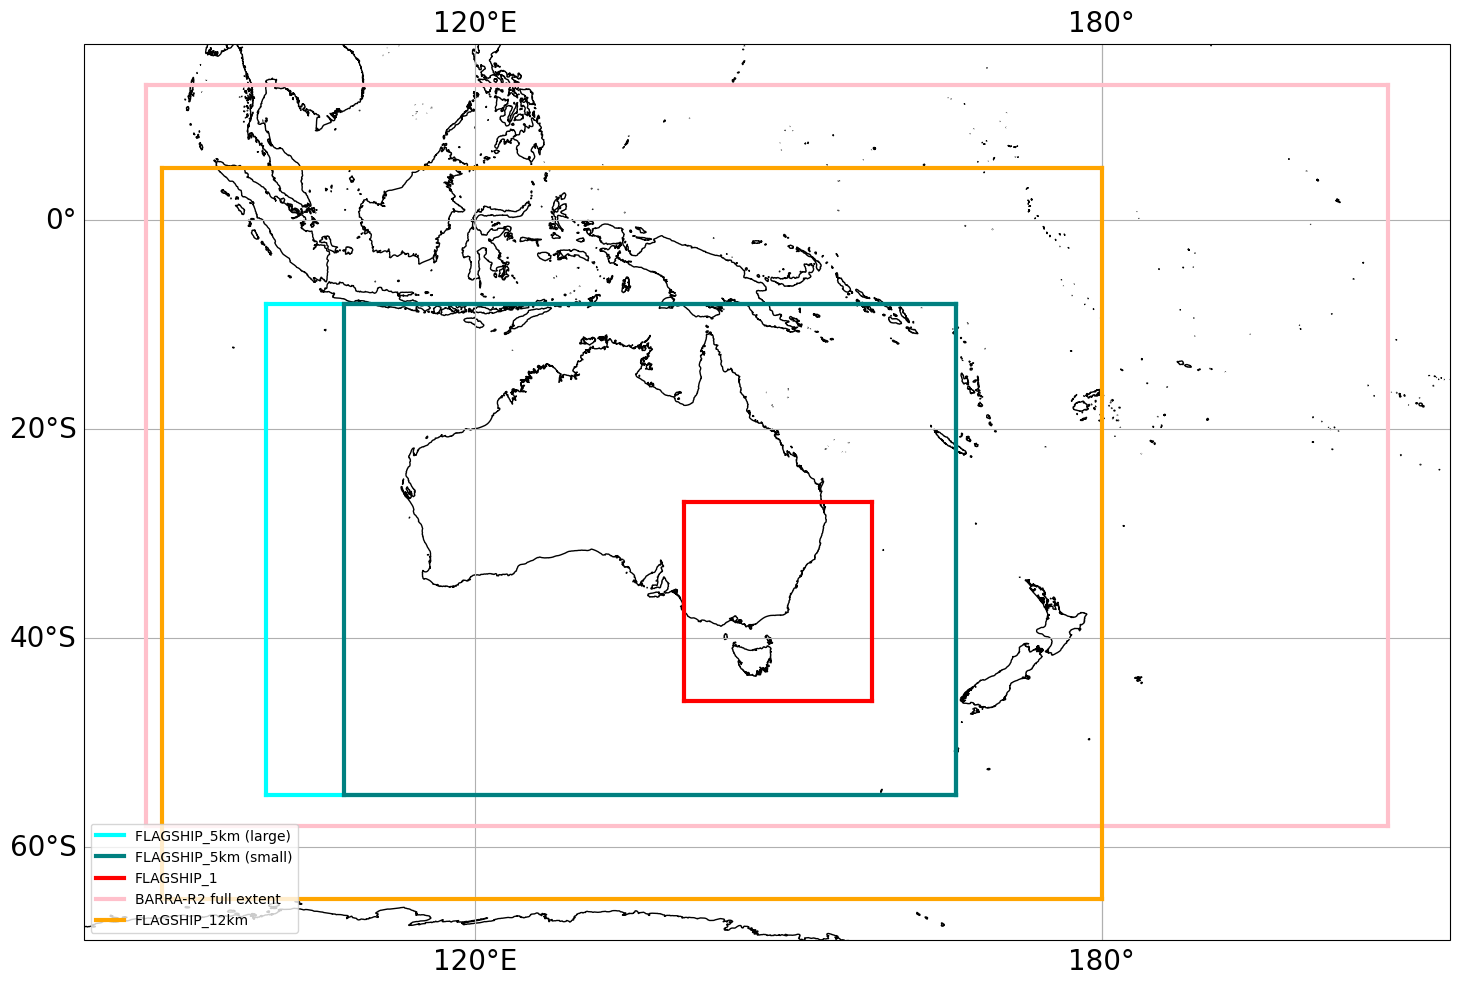

In [2]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.gridlines(draw_labels=True)

draw_box_corners(ax, 'FLAGSHIP_5km (large)', corners=[100,166,-8,-55], color='aqua',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_5km (small)', corners=[107.5,166,-8,-55], color='teal',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_1', corners=[140,158,-27,-46], color='red',linewidth=3)
draw_box_corners(ax, 'BARRA-R2 full extent', corners=[88.48,207.39,12.98,-57.97], color='pink',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_12km', corners=[90.,180.,5,-65.], color='orange',linewidth=3)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':20})
plt.tight_layout()
plt.savefig('Flagship_5km_options.png')

Let's draw some domain boundaries just by specifying the lat/lon extents.

In [3]:
# Load a BARRA-R2 grid to align centre
BARRA2_DIR = Path('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/tas/v20240809/')
barra_data = xr.load_dataset( BARRA2_DIR / 'tas_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_202411-202411.nc').tas

Now let's compute these domains using the UM reconfiguration parameters (centre, resolution and number of points)

In [4]:
barra_data[0].sel(lat=slice(-32,-31),lon=slice(132,143)).lon

<xarray.DataArray 'lon' (lon: 100)> Size: 800B
array([132.04, 132.15, 132.26, 132.37, 132.48, 132.59, 132.7 , 132.81, 132.92,
       133.03, 133.14, 133.25, 133.36, 133.47, 133.58, 133.69, 133.8 , 133.91,
       134.02, 134.13, 134.24, 134.35, 134.46, 134.57, 134.68, 134.79, 134.9 ,
       135.01, 135.12, 135.23, 135.34, 135.45, 135.56, 135.67, 135.78, 135.89,
       136.  , 136.11, 136.22, 136.33, 136.44, 136.55, 136.66, 136.77, 136.88,
       136.99, 137.1 , 137.21, 137.32, 137.43, 137.54, 137.65, 137.76, 137.87,
       137.98, 138.09, 138.2 , 138.31, 138.42, 138.53, 138.64, 138.75, 138.86,
       138.97, 139.08, 139.19, 139.3 , 139.41, 139.52, 139.63, 139.74, 139.85,
       139.96, 140.07, 140.18, 140.29, 140.4 , 140.51, 140.62, 140.73, 140.84,
       140.95, 141.06, 141.17, 141.28, 141.39, 141.5 , 141.61, 141.72, 141.83,
       141.94, 142.05, 142.16, 142.27, 142.38, 142.49, 142.6 , 142.71, 142.82,
       142.93])
Coordinates:
    time     datetime64[ns] 8B 2024-11-01T12:00:00
  * lon      (lon) float64 800B 132.0 132.2 132.3 132.4 ... 142.7 142.8 142.9
    height   float64 8B 1.5
    crs      int32 4B 0
Attributes:
    standard_name:  longitude
    units:          degrees_east
    axis:           X
    long_name:      longitude

In [5]:
# Flagship 5km domain. Target domain is [107.5,166,-8,-55]

inner_ew=(166-107.5)
inner_ns=(55-8)
ew_centre = 107.5+inner_ew/2
ns_centre=8+inner_ns/2

print (ew_centre,ns_centre)

FLAGSHIP_5km_CENTRE=[-31.57,136.75]
FLAGSHIP_5km_RES=[0.045,0.045]
FLAGSHIP_5km_SIZE=[1044,1300]

print_corners(FLAGSHIP_5km_CENTRE, FLAGSHIP_5km_RES, FLAGSHIP_5km_SIZE)

136.75 31.5
For [-31.57, 136.75] with [0.045, 0.045] and [1044, 1300]: 
coords = 107.500, 166.000, -55.060, -8.080


In [6]:
# Flagship ERAto5km domain. Target domain is [100,166,-8,-55]

inner_ew=(166-100.)
inner_ns=(55-8)
ew_centre = 100.+inner_ew/2
ns_centre=8+inner_ns/2

print (ew_centre,ns_centre)

FLAGSHIP_BARRAto5km_CENTRE=[-31.57,133.03]
FLAGSHIP_BARRAto5km_RES=[0.045,0.045]
FLAGSHIP_BARRAto5km_SIZE=[1044,1466]

print_corners(FLAGSHIP_BARRAto5km_CENTRE, FLAGSHIP_BARRAto5km_RES, FLAGSHIP_BARRAto5km_SIZE)

133.0 31.5
For [-31.57, 133.03] with [0.045, 0.045] and [1044, 1466]: 
coords = 100.045, 166.015, -55.060, -8.080


In [7]:
# Flagship BARRA-R2 internal domain. Target domain is [90,180,-5,-65]

FLAGSHIP_BARRA_CENTRE=[-31.57,133.03]
FLAGSHIP_BARRA_RES=[0.11,0.11]
FLAGSHIP_BARRA_SIZE=[610,780]

print_corners(FLAGSHIP_BARRA_CENTRE, FLAGSHIP_BARRA_RES, FLAGSHIP_BARRA_SIZE)

For [-31.57, 133.03] with [0.11, 0.11] and [610, 780]: 
coords = 90.130, 175.930, -65.120, 1.980


In [8]:
# Flagship BARRA-R2 external domain. Target domain is [90,180,-5,-65]

FLAGSHIP_BARRA_EX_CENTRE=[-31.57,133.03]
FLAGSHIP_BARRA_EX_RES=[0.11,0.11]
FLAGSHIP_BARRA_EX_SIZE=[630,800]

print_corners(FLAGSHIP_BARRA_EX_CENTRE, FLAGSHIP_BARRA_EX_RES, FLAGSHIP_BARRA_EX_SIZE)

For [-31.57, 133.03] with [0.11, 0.11] and [630, 800]: 
coords = 89.030, 177.030, -66.220, 3.080


In [9]:
# Flagship 1-km domain. Target domain is [140,158,-27,-46]

FLAGSHIP_1_CENTRE=[-36.57,149.03]
FLAGSHIP_1_RES=[0.009,0.009]
FLAGSHIP_1_SIZE=[2112,2000]

print_corners(FLAGSHIP_1_CENTRE, FLAGSHIP_1_RES, FLAGSHIP_1_SIZE)

For [-36.57, 149.03] with [0.009, 0.009] and [2112, 2000]: 
coords = 140.030, 158.030, -46.074, -27.066


In [10]:
# Compute offset between 1 km domain centre and ERAto5km
import numpy as np
offset = np.array(FLAGSHIP_BARRAto5km_CENTRE) - np.array(FLAGSHIP_1_CENTRE)
print (offset)

[  5. -16.]


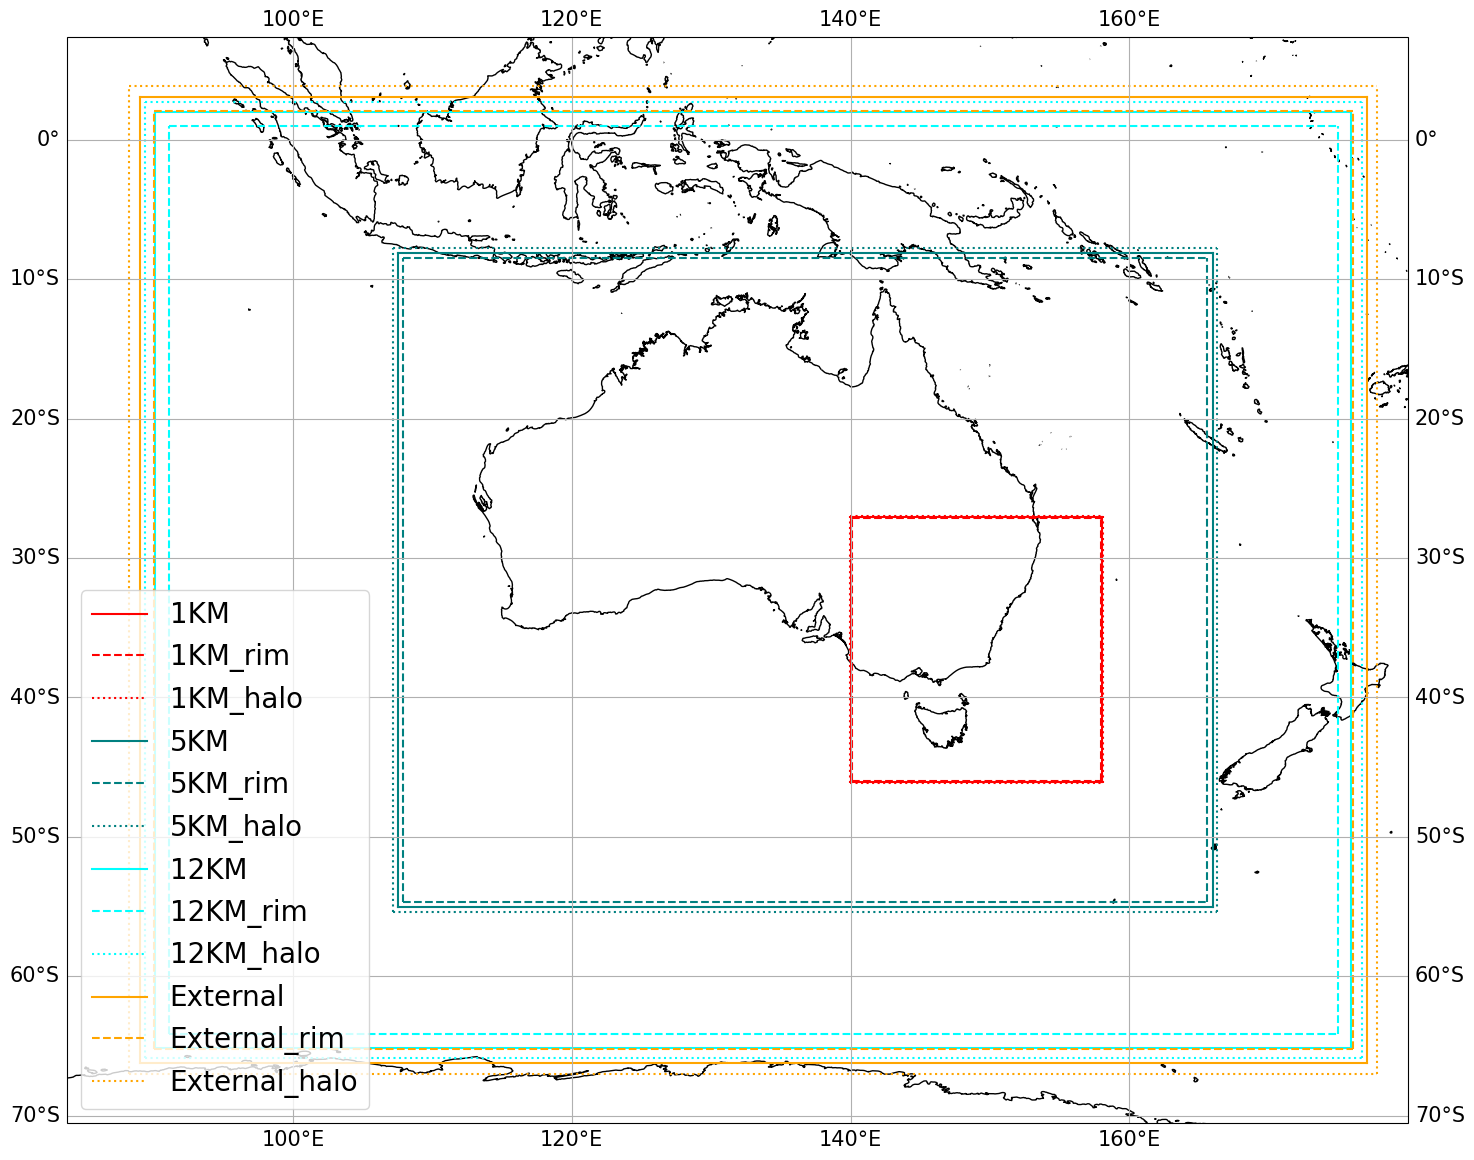

In [11]:
# Re-plot using UM reconfiguration parameters

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
flagship_1km_coords = plot_region(ax, '1KM', centre=FLAGSHIP_1_CENTRE, res=FLAGSHIP_1_RES, size=FLAGSHIP_1_SIZE, color='r')
flagship_5km_coords = plot_region(ax, '5KM', centre=FLAGSHIP_5km_CENTRE, res=FLAGSHIP_5km_RES, size=FLAGSHIP_5km_SIZE, color='teal')
flagship_12km_coords = plot_region(ax, '12KM', centre=FLAGSHIP_BARRA_CENTRE, res=FLAGSHIP_BARRA_RES, size=FLAGSHIP_BARRA_SIZE, color='cyan')
flagship_12km_ext_coords = plot_region(ax, 'External', centre=FLAGSHIP_BARRA_EX_CENTRE, res=FLAGSHIP_BARRA_EX_RES, size=FLAGSHIP_BARRA_EX_SIZE, color='orange')

ax.gridlines(draw_labels=True)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':15})
plt.tight_layout()
plt.savefig('Flagship_rims_halos.png')

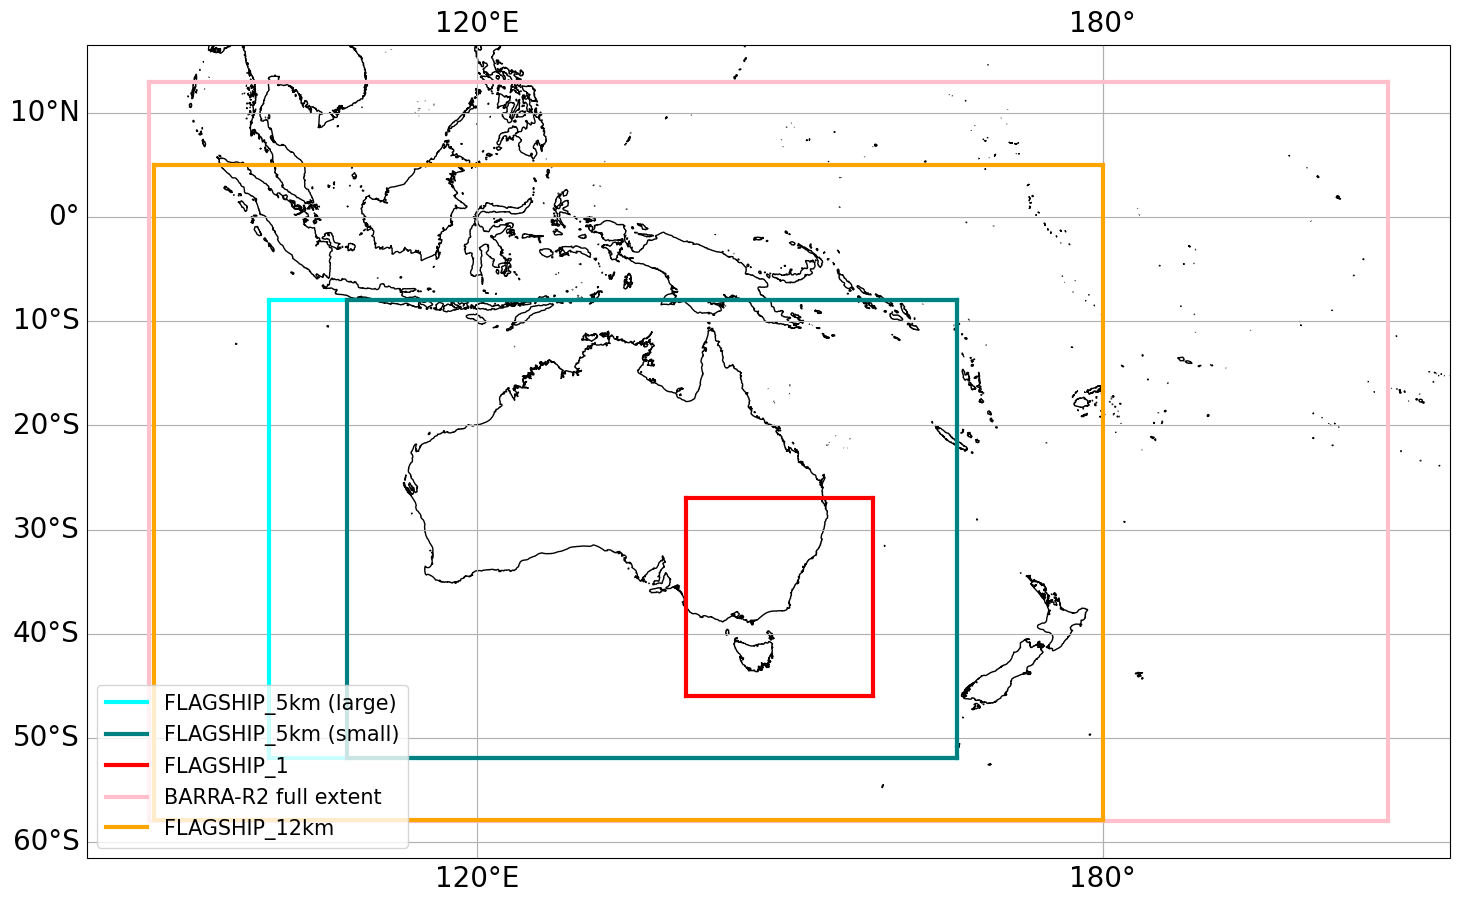

In [12]:
# Options for 5km and 12 km nests that lie within BARRA2-R domain

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.gridlines(draw_labels=True)

draw_box_corners(ax, 'FLAGSHIP_5km (large)', corners=[100,166,-8,-51.95], color='aqua',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_5km (small)', corners=[107.5,166,-8,-51.95], color='teal',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_1', corners=[140,158,-27,-46], color='red',linewidth=3)
draw_box_corners(ax, 'BARRA-R2 full extent', corners=[88.48,207.39,12.98,-57.97], color='pink',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_12km', corners=[89.,180.,5,-57.9], color='orange',linewidth=3)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':20})
plt.tight_layout()
plt.savefig('Flagship_5km_options2.png')

In [13]:
delta=57.9-46
print (delta/2+46)

51.95


In [17]:
# Redefine 5 km nest target is [100,166,-8,-51.95]

FLAGSHIP_BARRAto5km_CENTRE=[-29.95,133.03]
FLAGSHIP_BARRAto5km_RES=[0.045,0.045]
FLAGSHIP_BARRAto5km_SIZE=[976,1466]

print_corners(FLAGSHIP_BARRAto5km_CENTRE, FLAGSHIP_BARRAto5km_RES, FLAGSHIP_BARRAto5km_SIZE)

For [-29.95, 133.03] with [0.045, 0.045] and [976, 1466]: 
coords = 100.045, 166.015, -51.910, -7.990


In [75]:
# Redefine outer nests to lie inside BARRA-R2 domains.

# Flagship BARRA-R2 internal domain. Target domain is [90,180,-5,-65]

FLAGSHIP_BARRA_CENTRE=[-24.86,133.03]
FLAGSHIP_BARRA_RES=[0.11,0.11]
FLAGSHIP_BARRA_SIZE=[580,780]

print_corners(FLAGSHIP_BARRA_CENTRE, FLAGSHIP_BARRA_RES, FLAGSHIP_BARRA_SIZE)

# Flagship BARRA-R2 external domain. Target domain is [88.48,207.39,12.98,-57.97]

FLAGSHIP_BARRA_EX_CENTRE=[-24.86,133.03]
FLAGSHIP_BARRA_EX_RES=[0.11,0.11]
FLAGSHIP_BARRA_EX_SIZE=[600,800]

print_corners(FLAGSHIP_BARRA_EX_CENTRE, FLAGSHIP_BARRA_EX_RES, FLAGSHIP_BARRA_EX_SIZE)

For [-24.86, 133.03] with [0.11, 0.11] and [580, 780]: 
coords = 90.130, 175.930, -56.760, 7.040
For [-24.86, 133.03] with [0.11, 0.11] and [600, 800]: 
coords = 89.030, 177.030, -57.860, 8.140


In [76]:
# Test centre points are aligned with BARRA-R2 grid
BARRA2_DIR = Path('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/tas/v20240809/')
barra_data = xr.load_dataset( BARRA2_DIR / 'tas_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_202411-202411.nc').tas

In [77]:
barra_data.sel(lon=slice(136,137)).lon.values

array([136.  , 136.11, 136.22, 136.33, 136.44, 136.55, 136.66, 136.77,
       136.88, 136.99])

In [78]:
barra_data.sel(lat=slice(-25.5,-24.5)).lat.values

array([-25.41, -25.3 , -25.19, -25.08, -24.97, -24.86, -24.75, -24.64,
       -24.53])

In [79]:
# Compute resolution offsets
offset = np.array(FLAGSHIP_BARRAto5km_CENTRE) - np.array(FLAGSHIP_BARRA_EX_CENTRE)
print (f'5 km region offset = {offset}')

offset = np.array(FLAGSHIP_1_CENTRE) - np.array(FLAGSHIP_BARRA_EX_CENTRE) 
print (f'1 km region offset = {offset}')

5 km region offset = [-5.09  0.  ]
1 km region offset = [-11.71  16.  ]


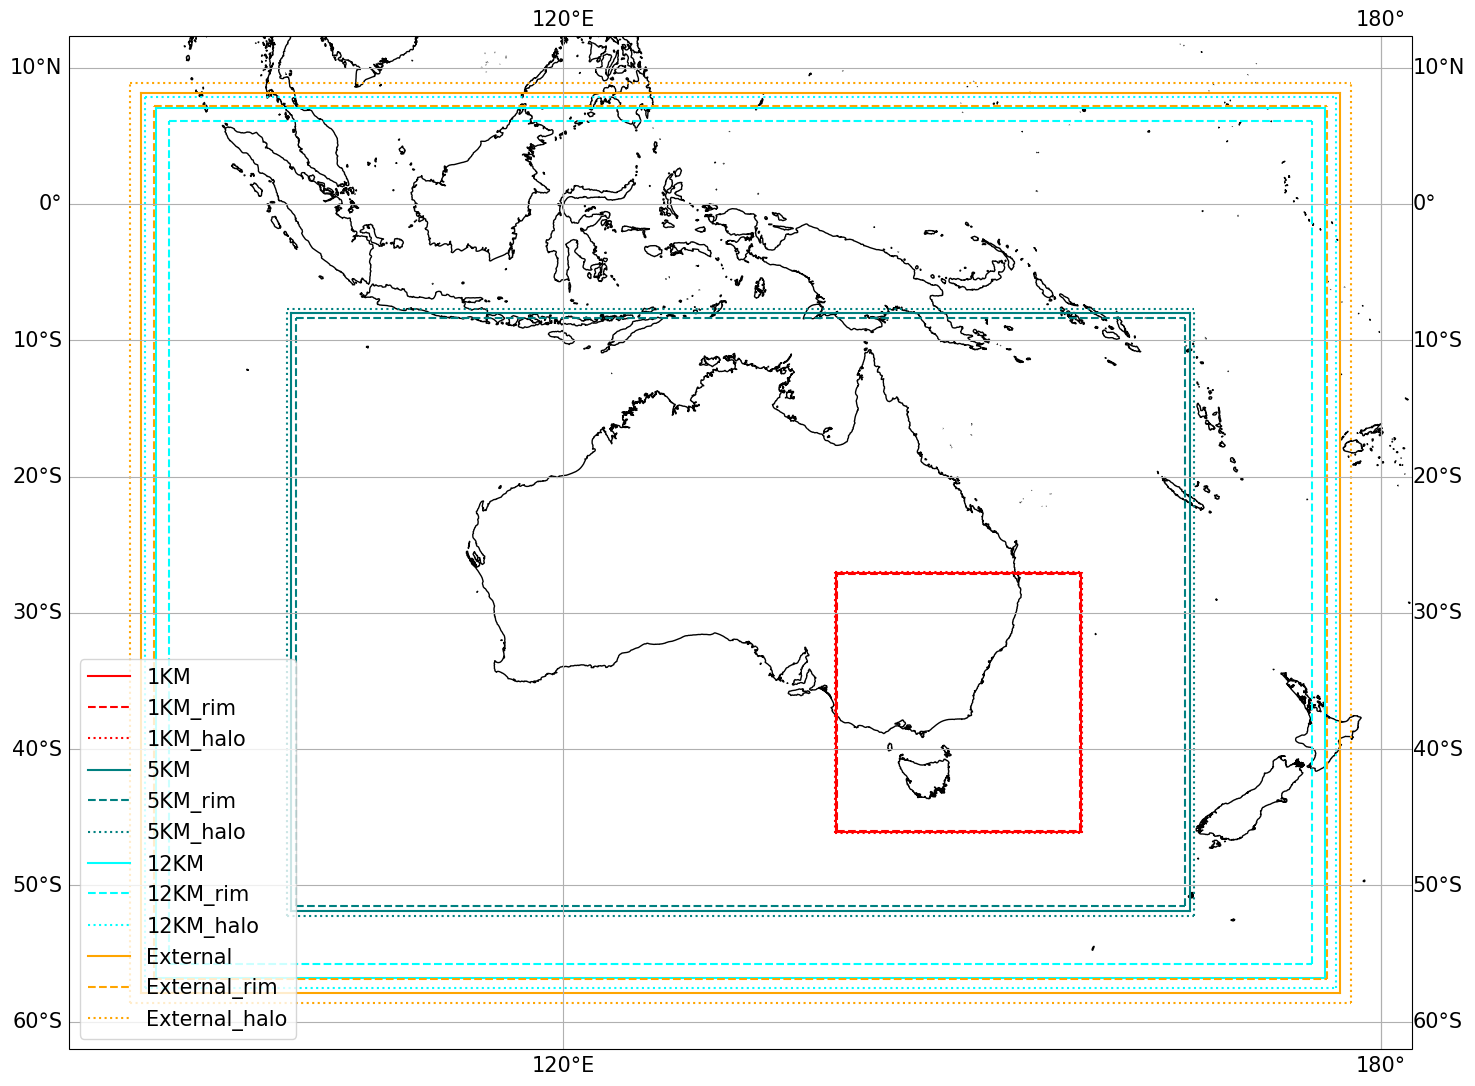

In [80]:
# Re-plot using UM reconfiguration parameters

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
flagship_1km_coords = plot_region(ax, '1KM', centre=FLAGSHIP_1_CENTRE, res=FLAGSHIP_1_RES, size=FLAGSHIP_1_SIZE, color='r')
flagship_5km_coords = plot_region(ax, '5KM', centre=FLAGSHIP_BARRAto5km_CENTRE, res=FLAGSHIP_BARRAto5km_RES, size=FLAGSHIP_BARRAto5km_SIZE, color='teal')
flagship_12km_coords = plot_region(ax, '12KM', centre=FLAGSHIP_BARRA_CENTRE, res=FLAGSHIP_BARRA_RES, size=FLAGSHIP_BARRA_SIZE, color='cyan')
flagship_12km_ext_coords = plot_region(ax, 'External', centre=FLAGSHIP_BARRA_EX_CENTRE, res=FLAGSHIP_BARRA_EX_RES, size=FLAGSHIP_BARRA_EX_SIZE, color='orange')

ax.gridlines(draw_labels=True)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':15})
plt.tight_layout()
plt.savefig('Flagship_rims_halos.png')

In [33]:
import iris
test = iris.load('/home/548/pag548/cylc-run/u-dq124/share/data/ancils/Flagship_ERA5to1km/BARRA-R2-halo/qrparm.orog.mn')



In [13]:
test[0]

<iris 'Cube' of surface_altitude / (m) (latitude: 630; longitude: 800)>

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


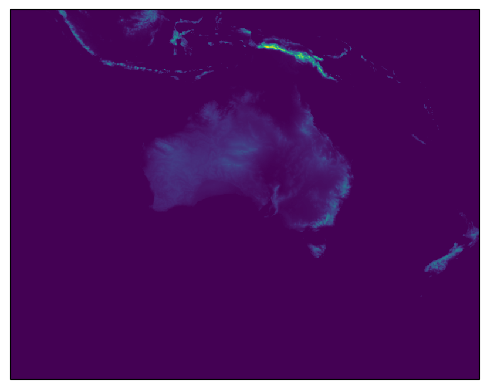

In [14]:
import iris.plot
iris.plot.pcolormesh(test[0])


In [15]:
test[0].coords('latitude')

[<DimCoord: latitude / (degrees)  [-66.22, -66.11, ..., 2.86, 2.97]  shape(630,)>]

In [16]:
dir(test[0])

['__add__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__orthogonal_indexing__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_unique_aux_coord',
 '_add_unique_dim_coord',
 '_ancillary_variables_and_dims',
 '_any_meshcoord',
 '_as_list_of_coords',
 '_aux_coords_and_dims',
 '_aux_factories',
 '_cell_measures_and_dims',
 '_check_multi_dim_metadata',
 '_data_manager',
 '_deepcopy',
 '_dim_coords_and_dims',
 '_dimensional_metadata',
 '_i